Correções no import e classificador SVC feitas. Muito obtigado pelo suport

from sklearn.svm import SVC

clf = svm.SVC(gamma=valor_Aqui).fit(X_train, y_train)

In [1]:
# import bibliote matplotlib
import matplotlib.pyplot as plt

# import datasets
from sklearn import datasets

# import classifiers 
from sklearn import svm

# import performance
from sklearn.model_selection import train_test_split

#permite salvar um modelo de classificação treinado
import pickle

#import para manipulação de dados
import pandas as pd
import numpy as np

#import do svc classificador
from sklearn.svm import SVC

#import para auxiliar no Cross Validation
from sklearn.metrics import make_scorer, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score
from sklearn import metrics

#import para Cross Validation
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.model_selection import cross_val_score

# ------------------COMEÇO (1:A)------------------

In [2]:
#importando data_set Mnist
df_numeros = datasets.load_digits()

# ------------------FIM (1:A)------------------

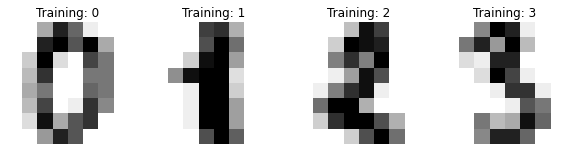

In [3]:
#descompacta os valores dos dados de entrada. Define o numero, linhas e colunas
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 3)) 

for ax, image, label in zip(axes, df_numeros.images, df_numeros.target):
    ax.set_axis_off()
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest") #metodo de plot
    ax.set_title("Training: %i" % label)

In [4]:
print(fig)
print(axes)

Figure(720x216)
[<AxesSubplot:title={'center':'Training: 0'}>
 <AxesSubplot:title={'center':'Training: 1'}>
 <AxesSubplot:title={'center':'Training: 2'}>
 <AxesSubplot:title={'center':'Training: 3'}>]


In [5]:
#redimencionar imagem (achatar)
n_samples = len(df_numeros.images) 
data = df_numeros.images.reshape((n_samples, -1))

# ------------------COMEÇO (1:B)------------------

In [6]:
# Atribuindo proporção de dados de teste e treino
X_train, X_test, y_train, y_test = train_test_split(
    data, df_numeros.target, test_size = 0.2, shuffle =  False)

# ------------------FIM (1:B)------------------

In [7]:
#Atribuindo/Criando o Classificador SVC a uma variaveel
#clf1.fit(X_train, y_train)  <----  Jogando os dados de treino no classificador !!!!!(Ta correta essa interpretação?)!!!!!
#gamma é um hiper-parametro
clf1 = svm.SVC(gamma = 0.001).fit(X_train, y_train)

In [8]:
#pode ser feita da maneira abaixo tbm
#clf1.fit(X_train, y_train)

# Calculo do Y_predito sem ter que fazer toda a estrutura de regreção
predicted = clf1.predict(X_test)

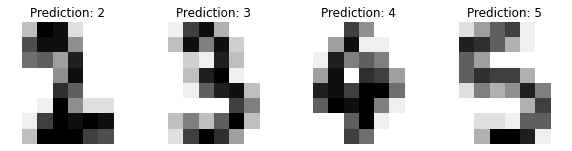

In [9]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 3))

for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation = "nearest")
    ax.set_title(f"Prediction: {prediction}")

In [10]:
print(f"Relatorio estatistico do classificador {clf1}:\n",
      f"{metrics.classification_report(y_test, predicted)}\n")

Relatorio estatistico do classificador SVC(gamma=0.001):
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       0.97      0.81      0.88        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.84      0.94      0.89        33
           9       0.95      0.95      0.95        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360




Utilizando a proporção mais comun, de 70% para treino e 30% para teste, temos uma otima acuracis, que representa a % de procimidade dos acertor, a precição esta boa 

In [11]:
#salvando o modelo. Possivel por conta do: import pickle
svc_clf1_treinado = pickle.dumps(clf1)

In [12]:
#carregando o modelo treinado
svc_clf1_carregado = pickle.loads(svc_clf1_treinado)
svc_clf1_carregado.predict(data[0:1])

array([0])

In [13]:
#fazendo predição do novo dado com o modelo carregado
svc_clf1_carregado.predict([X_test[0]]) 

array([2])

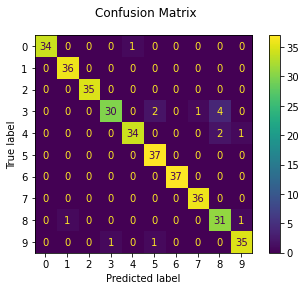

In [14]:
#Usando a Matris de confução para ter uma noção do quanto meu classificador esta..
#... classificando erroniamente algo da minha imagem
disp = metrics.plot_confusion_matrix(svc_clf1_carregado, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

# ------------------COMEÇO (1:C) (CV metodo 1)------------------
- Referencia: https://scikit-learn.org/stable/modules/cross_validation.html

In [15]:
X, y = datasets.load_digits(return_X_y = True)
print(X.shape, y.shape)

(1797, 64) (1797,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.4, random_state = 0)

X_train.shape, y_train.shape

X_test.shape, y_test.shape

clf = svm.SVC(kernel = "linear", C = 1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9749652294853964

In [24]:
clf = svm.SVC(kernel = "linear", C = 1, random_state = 42)
scores = cross_val_score(clf, X, y, cv = 5)
print(scores)

[0.96388889 0.91944444 0.96657382 0.9637883  0.92479109]


In [18]:
print("%0.2f acuracia e desvio padrão de %0.2f" % (scores.mean(), scores.std()))

0.95 acuracia e desvio padrão de 0.02


# ------------------FIM (1:C) (CV metodo 1)------------------

# ------------------COMEÇO (1:D)------------------

- Referencia: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py

In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Nivelando a imagem, transformando em matris, para poder aplicar um classificador
n_samples = len(df_numeros.images)
X = df_numeros.images.reshape((n_samples, -1))
y = df_numeros.target

#--------------------------------------------------------------------------

#se parando o dataset em 2, igualmente
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

#--------------------------------------------------------------------------

# Definindo um dicionario com muitos hiper-parametros, para futuros testes e comparação
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

#for para percorrer a lista com as strings "precision" e "recal"
for score in scores:
    print("\n\n> Ajustando hiper-parametro para %s" % score,"\n\n")

    #definindo classificador GrindSearchCV, e lhe foi passado muitos parametros, inclusive o dicionario de Hiper-Parametros "tuned_parameters"
    clf_grid = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf_grid.fit(X_train, y_train)

    print("> Melhores parametros de definição encotrados no dicionario são:\n\n")
    
    print(clf_grid.best_params_,"\n\n")
    
    print("Grid scores no conjunto de desenvolvimento: \n\n")

    means = clf_grid.cv_results_['mean_test_score']
    stds = clf_grid.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf_grid.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

    print("\n\nRelatorio de classificação detalhado:")
    print("O modelo é treinado no conjunto de desenvolvimento completo.")
    print("As pontuações são calculadas no conjunto de avaliação completo.\n\n")
    
    y_true, y_pred = y_test, clf_grid.predict(X_test)
    
    print(classification_report(y_true, y_pred))
    print("-"*90)

# Observe que o problema é muito fácil: o platô do hiperparâmetro é muito plano e o
# modelo de saída é o mesmo para precisão e recall com empates em qualidade.



> Ajustando hiper-parametro para precision 


> Melhores parametros de definição encotrados no dicionario são:


{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'} 


Grid scores no conjunto de desenvolvimento: 


0.991 (+/-0.010) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.973 (+/-0.020) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.991 (+/-0.010) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.991 (+/-0.010) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.989 (+/-0.010) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.991 (+/-0.010) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.989 (+/-0.010) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.980 (+/-0.014) for {'C': 1, 'kernel': 'linear'}
0.980 (+/-0.014) for {'C': 10, 'kernel': 'linear'}
0.980 (+/-0.014) for {'C': 100, 'kernel': 'linear'}
0.980 (+/-0.014) for {'C': 1000, 'kernel': 'linear'}


Relatorio de classificação detalhado:
O modelo é treinado no conj

### No entanto esses parametros tambem apresentam o mesmo resultado para a precisão.

- 0.991 (+/-0.010) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
- 0.991 (+/-0.010) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
- 0.991 (+/-0.010) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
- 0.991 (+/-0.010) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


### Para o recal tambem existem outras combinações de hiper-parametros que apresentão o mesmo resultado.


- 0.991 (+/-0.010) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
- 0.991 (+/-0.010) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
- 0.991 (+/-0.010) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
- 0.991 (+/-0.010) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

# ------------------FIM (1:D)------------------

# ------------------COMEÇO (1:E)------------------

In [21]:
from sklearn.gaussian_process.kernels import RBF
#não consegui ussar adequadamente esse iper parametro ^

n_samples = len(df_numeros.images)
X = df_numeros.images.reshape((n_samples, -1))
y = df_numeros.target

#kernel = 1.0 * RBF(1.0)

clf_best_hp = svm.SVC(C = 1, gamma = 0.001).fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

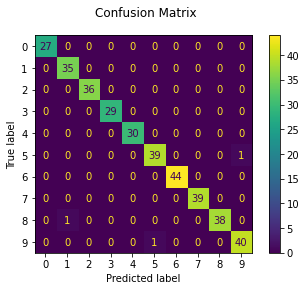

In [22]:
disp = metrics.plot_confusion_matrix(clf_best_hp, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

# ------------------FIM (1:E)------------------

In [23]:
y_true, y_pred = y_test, clf_best_hp.predict(X_test)
    
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        30
           5       0.97      0.97      0.97        40
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        39
           8       1.00      0.97      0.99        39
           9       0.98      0.98      0.98        41

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



# ------------------COMEÇO (2)------------------

# (2:A)
##### Accuracy = 0.99 como podemos observar no "plot" da função de relatorio do classificador (usei a accuracy do clf com melhores hiper-parametros, mesmo tendo risco de OuverFitting, no entanto como estou apenas identificando numeros borrados de uma imagem especifica, não tem muito problema)
##### gostari de ussar o clf do CV no entanto estou tendo diversos erros relacionados ao SVC. :-\

# (2:B)
#### O modelo teve uma exelente performaçe, conseguindo ser melhor que os anteriores. Apenas tres numeros tiveram classificação erronea, e apenas uma ves em cada.
##### Podemos comprovar a alegação acima atraves do relatorio do classificador ("classification_report(y_true, y_pred)") e do matrix de confunção.

# (2:C)
### Os melhores parametros para precisão de acordo com o codigo escrito no (ex:1), são:

- 0.991 (+/-0.010) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
- 0.991 (+/-0.010) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
- 0.991 (+/-0.010) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
- 0.991 (+/-0.010) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


### Os melhores parametros para recall de acordo com o codigo escrito no (ex:1), são:


- 0.991 (+/-0.010) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
- 0.991 (+/-0.010) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
- 0.991 (+/-0.010) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
- 0.991 (+/-0.010) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

# (2:D)
#### A falta de uma base, conhecimento previo, tanto referente a estrutura do classificador quanto no seus parametros.
##### O praso cujo não posso estender em demasia para terminar esse modulo.

# ------------------FIM (2)------------------

# ------------------COMEÇO (3)------------------

# (3:A)
#### Ha diferença entre eles é que os parametros são estimados automaticamente pelo modelo e dados em quetão. Já os hiperparâmetros são configurados automatiamente (no entanto existem maneiras de estimar qual o melhor, para não precisar testar 1 por 1, ou cada uma das desenas de cominações)

# (3:B)
#### 1-Alto custo de desemvolvimento :
- Principalmente na etapa de analize de dados, alocar eles, tratalos, demora muito e perde tempo da equipe que vai desenvolver o produto e/ou treinar um algoritimo.

#### 2-Obter o dado :
- Já esta bem difundidada que os dados são o novo petroleo, no entanto não é tarefa simples coletar dados bons, devido as politicas de pricvacidade e burocracia, no entanto o tiktiok ussou uma abordagem genial, apos o aplicativo popularisar muito as suas politicas de coleta de dados mudaram, e começou a coletar muito mais dados.

#### 3-Tecnologias rescentes :
- É uma faca de dois gumes. Por um lado, incorpora a mais recente tecnologia e desenvolvimentos, mas, por outro lado, não está pronto para a produção o que implica em constantes atualizações e exige um acompanhamento de perto
 
#### 4-Custo computacional :
- O usse de recursos computacional pode gerar muitos gastes, e uma empresa pequena pode acabar não tendo tanto recurso, por isso é necessario proficionais qualificados para não fazerem codgos sem performaçe, para identificarem se um codgo tão pesado e complexo é mesmo necessario

# (3:C)
- Ouverfitting.
- Solução 1: Aumentar a base de dados
- Solução 2: Alterrar a proporção dos dados de treino e teste  (ideial : 70%-30%, ou 65%-35%)
- Solução 3: Mudar o modelo de classificação 

# (3:D)
- É o cunjunto que treina o modelo, deve ser ussado para apurar o modelo

# (3:E)
- Validar a eficacia do modele escolido e treinado

# (3:F)
- Um ouverfitting dos dados

# ------------------FIM (3)------------------